### Simple data analysis & linear regression assessments of State of the Union speeches. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
from numpy.linalg import inv
with open("speeches.pkl", "r") as f:
    w = pickle.load(f)

In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/varshantdhar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
sent_text = nltk.sent_tokenize(w[0].text)
print sent_text[1]
print len(sent_text)

In the execution of those laws and of the powers vested by the Constitution in the Executive, unremitted attention has been paid to the great objects to which they extend.
150


In [64]:
dictlist = [dict() for x in range(len(w))]
total_words = 0
count_words = 0
total_sentences = 0
max_words = 0
min_words = 10000
i = 0
speech = {'Year': '2010', 'Sentences': '150', 'Words/Sentences': '29.8', 'Words': '1234', 'Max_Words': '0', 'Min_Words': '10000'}
for i in range(len(w)):
    year = w[i].year
    sent_text = nltk.sent_tokenize(w[i].text) 
    sent_number = len(sent_text)
    for sentence in sent_text:
        tokenized_words = nltk.word_tokenize(sentence)
        total_words += len(tokenized_words)
        count_words += len(tokenized_words)
        if count_words > max_words:
            max_words = count_words
        if count_words < min_words:
            min_words = count_words
        count_words = 0
    speech['Year'] = year
    speech['Sentences'] = sent_number
    speech['Words/Sentences'] = total_words/sent_number
    speech['Words'] = total_words
    speech['Max_Words'] = max_words
    speech['Min_Words'] = min_words
    total_words = 0
    max_words = 0
    min_words = 10000
    cp_speech = copy.copy(speech)
    dictlist.append(cp_speech)
    i += 1 

Number of Sentences by Year - Blue
Average Sentence Length by Year - Red


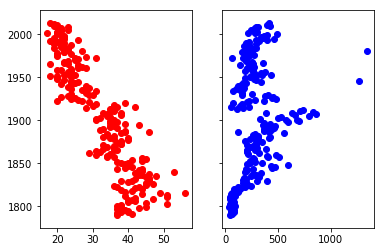

In [65]:
while {} in dictlist:
    dictlist.remove({})
sent_by_year = []
words_per_sent_by_yr = []
for sp in dictlist:
    sent_by_year.append([sp['Sentences'], sp['Year']])
    words_per_sent_by_yr.append([sp['Words/Sentences'], sp['Year']])
np_yr_words = np.array(words_per_sent_by_yr, dtype=float)
np_yr_sents = np.array(sent_by_year, dtype=float)

f, (ax1, ax2) = plt.subplots(1, 2, sharey = True)
ax1.scatter(np_yr_words[:,0], np_yr_words[:,1], c = 'red')
ax2.scatter(np_yr_sents[:,0], np_yr_sents[:,1], c = 'blue')
print("Number of Sentences by Year - Blue")
print("Average Sentence Length by Year - Red")

In [45]:
X, Y = np_yr_words[:,0], np_yr_words[:,1]
mean_x = np.mean(X)
mean_y = np.mean(Y)
m = len(X)

numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

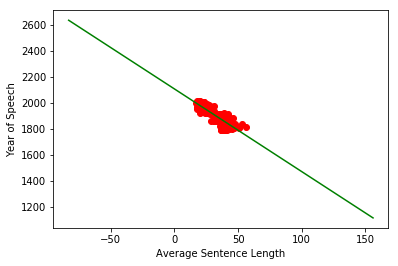

In [46]:
max_x = np.max(X) + 100
min_x = np.min(X) - 100

x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

plt.plot(x, y, color='green')
plt.scatter(X, Y, c='red')

plt.xlabel('Average Sentence Length')
plt.ylabel('Year of Speech')
plt.show()

In [47]:
X, Y = np_yr_sents[:,0], np_yr_sents[:,1]
mean_x = np.mean(X)
mean_y = np.mean(Y)
m = len(X)

numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

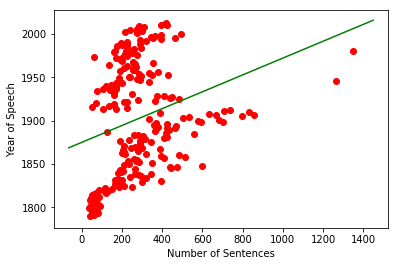

In [48]:
max_x = np.max(X) + 100
min_x = np.min(X) - 100

x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

plt.plot(x, y, color='green')
plt.scatter(X, Y, c='red')

plt.xlabel('Number of Sentences')
plt.ylabel('Year of Speech')
plt.show()

In [49]:
words_by_year1 = []
words_by_year2 = []
for speeches in dictlist:
    if (speeches['Year'] <= '1912'):
        words_by_year1.append([speeches['Words'], speeches['Year']])
    else:
        words_by_year2.append([speeches['Words'], speeches['Year']])
np_words_year1 = np.array(words_by_year1,dtype=float)
np_words_year2 = np.array(words_by_year2,dtype=float)

In [50]:
X, Y = np_words_year1[:,0], np_words_year1[:,1]
mean_x = np.mean(X)
mean_y = np.mean(Y)
m = len(X)

numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

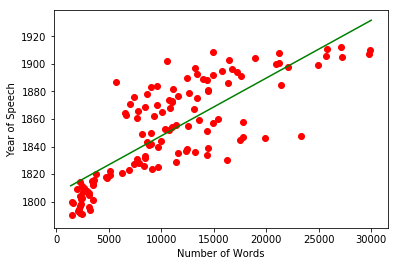

In [51]:
max_x = np.max(X) + 100
min_x = np.min(X) - 100

x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

plt.plot(x, y, color='green')
plt.scatter(X, Y, c='red')

plt.xlabel('Number of Words')
plt.ylabel('Year of Speech')
plt.show()

In [52]:
X, Y = np_words_year2[:,0], np_words_year2[:,1]
mean_x = np.mean(X)
mean_y = np.mean(Y)
m = len(X)

numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

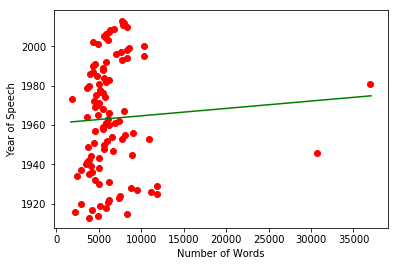

In [53]:
max_x = np.max(X) + 100
min_x = np.min(X) - 100
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

plt.plot(x, y, color='green')
plt.scatter(X, Y, c='red')

plt.xlabel('Number of Words')
plt.ylabel('Year of Speech')
plt.show()

From the two graphs, I first noticed that the length of the the speech by sheer numberr of words drastically reduced post 1913, hovering around the 5000 to 1500 word range. Prior to this, speeches were far more distributed with many speeches extending past 2000 words and even reaching 2500 to 3500 words. Checking out the historical context, we discover that the address was written and then sent to Congress to be read by a clerk until 1913 when Woodrow Wilson re-established the practice of delivering the message to a joint Congress. The oration of the speech, probably led to the speech being cut down in length and the wording substaintially reduced. Both of these are reflected in the linear regression models highlighted above.

In [54]:
from math import ceil
newlist = sorted(dictlist, key=lambda k: k['Words/Sentences'])
year_shortest = newlist[0]['Year']
year_longest = newlist[-1]['Year']
first_quantile = int(0.25*len(dictlist))
third_quantile = int(0.75*len(dictlist))
median = int(0.5*len(dictlist))
year_25 = newlist[first_quantile]['Year']
year_50 = newlist[median]['Year']
year_75 = newlist[third_quantile]['Year']
for d in w: 
    if d['year'] == year_shortest:
        print "The President with the shortest sentences on average is " + d['president']
    if d['year'] == year_longest:
        print "The President with the longest sentences on average is " + d['president']
    if d['year'] == year_25:
        print "The President at the 25th quantile is " + d['president']
    if d['year'] == year_50:
        print "The President at the median is " + d['president']
    if d['year'] == year_75:
        print "The President at the 75th quantile is " + d['president']

The President at the 25th quantile is Dwight D. Eisenhower
The President at the median is James Buchanan
The President at the 75th quantile is James Monroe
The President with the shortest sentences on average is George W. Bush
The President with the longest sentences on average is James Madison


In [74]:
minlist = sorted(dictlist, key=lambda k: k['Min_Words'])
maxlist = sorted(dictlist, key=lambda k: k['Max_Words'])
print "Shortest sentence is " + str(minlist[0]['Min_Words']) + " word long"
print "Longest sentence is " + str(maxlist[0-1]['Max_Words']) + " words long"

Shortest sentence is 1 word long
Longest sentence is 679 words long
